In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
## CREATE X and y
X = df.drop('sales',axis=1)
y = df['sales']

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
from sklearn.linear_model import ElasticNet

In [6]:
base_elastic_net_model = ElasticNet()

In [28]:
param_grid = {'alpha':[0.1,1,5,10,50,100], 'l1_ratio':[.1,.5,.7,.95,.99,1]}

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
grid_model = GridSearchCV(estimator=base_elastic_net_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=0)

In [31]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [23]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1)

In [35]:
y_pred = grid_model.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
mean_squared_error(y_test,y_pred)

2.387342642087475

In [38]:
r2_score(y_test, y_pred)

0.915438906791447

In [39]:
diff = pd.DataFrame({'True Value':y_test, 'Predicted':y_pred, 'Difference': y_test - y_pred})
diff[:20]

,True Value,Predicted,Difference
37,14.7,15.663689,-0.963689
109,19.8,19.464083,0.335917
31,11.9,11.533447,0.366553
89,16.7,16.903618,-0.203618
66,9.5,9.289864,0.210136
119,6.6,7.205126,-0.605126
54,20.2,20.126301,0.073699
74,17.0,17.217180,-0.217180
145,10.3,9.920592,0.379408
142,20.1,19.084014,1.015986


In [40]:
diff.mean()

True Value    13.348333
Predicted     13.551120
Difference    -0.202787
dtype: float64

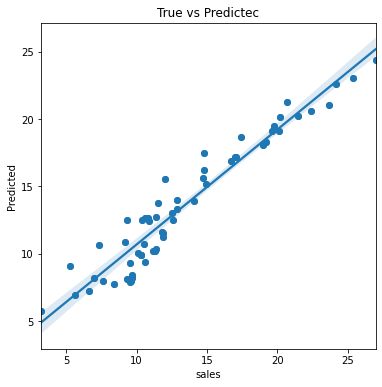

In [41]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel('True Value')
plt.ylabel('Predicted')
plt.title('True vs Predictec')
sns.regplot(x=y_test, y=y_pred);